# Live Data

The 'Getting Started' guide has up until this point demonstrated how HoloViews objects can wrap your data and be given a rich, useful representation. All of the visualizations assumed that the data was already available in memory so that it could be used to construct the appropriate object, and all of the resulting visualizations can be viewed in static HTML pages, no longer requiring Python when users interact with them.

In many important scenarios, the assumption that the data is immediately available in memory does not hold. The data of interest may exist on some remote server, making it unavailable locally until it is fetched. In other situations, the data may exist on the local disk, but be too large to fit into memory. Perhaps the data doesn't even exist yet: it may be the result of some computation yet to be performed or the outcome of some live process with the corresponding measurement not yet made.

All these scenarios are examples of *live data* that can be made available to HoloViews using the appropriate Python process. In this section, we will see how HoloViews allows you to build visualizations that can update dynamically to newly available data and that can respond to live user interaction.

<p><center><div class="alert alert-info" role="alert"><b>Note: </b>To work with live data, you need a live Python server, not a static web site, which is why the outputs shown below are GIF animations. If you run this notebook yourself, you will be able to try out your own interactions and compare them to the displayed GIF animations.</div></center></p>

## A computational process

Let us start by importing NumPy and HoloViews and setting some suitable defaults for the ``Curve`` element we will be using (disabling axes and grid lines):

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
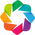

In [1]:
import holoviews as hv
import numpy as np
hv.extension('bokeh')
%opts Curve [show_grid=False xaxis=None yaxis=None]

There are many possible examples of live data, including financial data feeds, real-time scientific measurements, and sophisticated numerical simulations. Here we will consider the path traced by two very simple equations:

$$x_{n+1} = \sin(ay_n) + c \cos(ax_n)$$
$$y_{n+1} = \sin(bx_n) + d \cos(by_n)$$

These equations define the 'Clifford Attractor' described in the  book "Chaos In Wonderland" by [Cliff Pickover](https://en.wikipedia.org/wiki/Clifford_A._Pickover). Now let's write a simple Python function to iterate these two equations starting from position ``(x0,y0)``:

In [2]:
def clifford(a,b,c,d,x0,y0):
    xn,yn = x0,y0
    coords = [(x0,y0)]
    for i in range(10000):
        x_n1 = np.sin(a*yn) + c*np.cos(a*xn)
        y_n1 = np.sin(b*xn) + d*np.cos(b*yn)
        xn,yn = x_n1,y_n1
        coords.append((xn,yn))
    return coords

If we run this function now, we'll get a list of 10000 tuples, which won't be very informative.

The ``Curve`` element accepts the output of our ``clifford`` function, making it trivial to define a function that when called gives us a visualization:

In [3]:
def clifford_attractor(a,b,c,d):
    return hv.Curve(clifford(a,b,c,d,x0=0,y0=0))

We can then view the output for some combination of values for ``a,b,c,d``, starting from the origin:

In [4]:
%%opts Curve (line_width=0.03 color='red')
clifford_attractor(a =-1.5, b=1.5, c=1, d=0.75 )

:Curve   [x]   (y)

This HoloViews element gives us a snapshot for the four chosen values, but what we really would like to do is to interact with the four-dimensional parameter space directly, even though that parameter space is too large to compute all possible combinations feasibly.

## Live parameter exploration

To dynamically explore these parameters, we can start by declaring a ``DynamicMap``, passing in our function instead of the dictionary of ``Image`` elements we saw in the [Introduction](1-Introduction.ipynb). We declare the four arguments of our function as ``kdims``:

In [5]:
dmap = hv.DynamicMap(clifford_attractor, kdims=['a','b','c','d'])
dmap

DynamicMap cannot be displayed without explicit indexing as 'a', 'b', 'c', 'd' dimension(s) are unbounded. 
Set dimensions bounds with the DynamicMap redim.range or redim.values methods.

:DynamicMap   [a,b,c,d]

As you can see from the error message, HoloViews does not yet have the information needed to give us a visualization--it has no way to guess any value to use for the 'a','b','c', and 'd' dimensions.  Since we know what suitable values look like, we can easily specify appropriate ranges using the ``redim`` method:

In [6]:
%%opts Curve (line_width=0.03 color='green')
# When run live, this cell's output should match the behavior of the GIF below
dmap.redim.range(a=(-1.5,-1),b=(1.5,2),c=(1,1.2),d=(0.75,0.8))

:DynamicMap   [a,b,c,d]
   :Curve   [x]   (y)

<img src='https://assets.holoviews.org/gifs/guides/getting_started/5-Live_Data/live_data_1.gif'>

These ranges supplied with ``redim.range`` are semantic specifications of suitable values for each of the parameters and they are used to define suitable ranges for the interactive sliders above. Note how the HoloViews options system described in the [Customization section](2-Customization.ipynb) continues to work with the ``DynamicMap``.

## Live interaction

The live visualizations above are indistinguishable from standard HoloViews visualization, apart from the speed and memory usage. With a live Python server and the Bokeh backend, HoloViews can also be used to build highly customized interactive displays using ``DynamicMap`` and the *streams system*. A HoloViews stream is simply a parameter of a corresponding stream class configured to track some variable that reflects a user interaction. For instance, let's write a function that accepts an initial ``x`` and ``y`` value and computes a more complex version of the above plot, showing the ``x``,``y`` point as a dot along with a line segment indicating the first step taken when computing the attractor and some text indicating the starting point:

In [7]:
def interactive_clifford(a,b,c,d,x=0,y=0):
    coords = clifford(a,b,c,d,x0=x,y0=y)
    return (hv.Curve(coords) * hv.Points(coords[0]) * hv.Curve(coords[:2], group='Init')
            * hv.Text(-0.75,1.35, 'x:{x:.2f} y:{y:.2f}'.format(x=coords[0][0],y=coords[0][1])))

All we have done is create an ``Overlay`` as described in the [Introduction](1-Introduction.ipynb) containing our Clifford attractor curve and a few other HoloViews elements parameterized accordingly, including ``Points`` and the ``Text`` annotation. Passing this function to ``DynamicMap`` together with a `PointerXY` stream that grabs the x,y locations of the mouse (in data space) creates an explorable visualization that you can interact with directly.  The plot now shows the attractor (in blue) and the starting point and first step (in red), with the starting point following the mouse position:

In [8]:
from holoviews.streams import PointerXY

In [9]:
%%opts Curve (line_width=0.03 color='blue') Points (color='red' size=10) Curve.Init (color='red' line_width=2)
# When run live, this cell's output should match the behavior of the GIF below
dmap = hv.DynamicMap(interactive_clifford, kdims=['a','b','c','d'], streams=[PointerXY(x=0,y=0)])
dmap.redim.range(a=(-1.4,-1),b=(1.6,1.8),c=(1,1.5),d=(0.7,0.8))

:DynamicMap   [a,b,c,d]
   :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Points.I :Points   [x,y]
      .Init.I   :Curve   [x]   (y)
      .Text.I   :Text   [x,y]

<img src='https://assets.holoviews.org/gifs/guides/getting_started/5-Live_Data/live_data_2.gif'></img>


By exploring with the mouse, see if you can find the fixed-point location (where the next step maps you to the same position) located at ``x=0.18,y=0.65`` with parameters ``a=-1.4, b=1.6, c=1`` and ``d=0.7``.

To learn more about the streams system please consult the [user guide](../user_guide/06-Live_Data.ipynb) and check out our [Streams gallery](../reference/index.html#streams).

## Tradeoffs using live data

``DynamicMap`` and ``Streams`` allow specification of exciting, dynamic visualizations that let you build full-featured interactive applications and simulations with very little code (particularly when combined with a declarative widget library like [ParamNB](https://github.com/ioam/paramnb) or [ParamBokeh](https://github.com/ioam/parambokeh)). The way these dynamic visualizations work is that HoloViews runs JavaScript in your browser, which then communicates with a running Python server process that may be running in the Jupyter notebook server or in the [Bokeh server](http://bokeh.pydata.org/en/latest/docs/user_guide/server.html). This Python process may be running locally on your machine or on some remote internet or local-network server. Regardless of where it is running, this Python process executes the callback you supply to ``DynamicMap``, allowing HoloViews to update your visualization whenever the parameters change.

This architecture is powerful and fully general, as you can always make static content in memory into dynamic output generated by a function (see the [User Guide](../user_guide/06-Live_Data.ipynb) to learn more). Using live data is not always recommended, however, because using purely static content also has some important advantages:

### Reasons to use live data

* Your data is inherently coming from a live source and your visualization needs to reflect this in real time.
* You wish to explore a large parameter space and statically sampling this space adequately is prohibitive in memory or computation time.
* Your data is too big to fit in memory and you only need to explore a portion of it that you can stream in from disk.
* You want an open-ended visualization that keeps updating indefinitely.

### Reasons to use static data

* You wish to archive or record your visualization in such a way that it exists independently of code execution in a potentially changing codebase.
* You wish to share visualizations in a static HTML file that does not require running a live server (e.g a file that can be e-mailed and immediately viewed or placed on an HTML server).

The general recommendation is to visualize your data with ``HoloMap`` (as in the introduction to this guide) when you have a small amount of data (typically a few megabytes) that can be quickly computed and can reasonably be embedded into an HTML file. Otherwise, you can use ``DynamicMap`` that you can sample from to generate a ``HoloMap`` from when you wish to share your results (see the [user guide](../user_guide/06-Live_Data.ipynb) for more information on how to turn your ``DynamicMap`` objects into ``HoloMap``s).

Now that you have explored the basic capabilities of HoloViews, you should try it out on your own data, guided by the [user guide](../user_guide/) and following examples in the component [reference gallery](../reference/) and other demos in the [gallery](../gallery/).